# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Actividad Semana 5

### **Vectores Embebidos de OpenAI**

#### **Nombres y matrículas de los integrantes del equipo:**



* 🧑‍💻 Ovidio Alejandro Hernández Ruano (A01796714)
* 🧑‍💻 José Manuel Toral Cruz (A01122243)
* 🧑‍💻 Oscar Enrique García García (A01016093)
* 🧑‍💻 Luis Gerardo Sanchez Salazar (A01232963)



In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
# Manejo de datos, archivos y estructuras
import os
import re
import string
import pandas as pd
import numpy as np
import pickle
from collections import Counter

# Procesamiento de lenguaje natural
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
ps = PorterStemmer()

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Tensorflow para NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# Visualización
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Incluye las celdas necesarias para tu acceso a la API de OpenAI.

# Se instalan las librerías
!pip install openai
import openai
from google.colab import userdata
from openai import OpenAI

# Se manda a llamar el API key
api_key = userdata.get("mi_OpenAI_API_key")
openai.api_key = api_key
if not api_key:
  raise(ValueError("API Key not found"))

# Función para preguntar a GPT
def ask_GPT(prompt, modelo="gpt-4o-mini", api_key=api_key):
  client = OpenAI(api_key=api_key)
  response = client.responses.create(
      model=modelo,
      input=prompt
  )
  answer = response.output_text
  return(answer)

In [3]:
# Llamando a la función askGPT como prueba
Test = True
if Test:
  print(f"="*60)
  print(f"Prueba de askGPT: Enviar prompt a OpenAI")
  print(f"="*60)
  prompt = "If you had to describe Tecnológico de Monterrey in a single word, what would it be?"
  answer = ask_GPT(prompt)
  print(f"Input: {prompt}")
  print(f"Output: {answer}")

Prueba de askGPT: Enviar prompt a OpenAI
Input: If you had to describe Tecnológico de Monterrey in a single word, what would it be?
Output: Innovative.


In [4]:
# Cargando archivos PKL de embeddings
# Si Load es True, se descargarán los archivos de los embeddings previamente generados
# Si Load es False, se generarán los embeddings
Load = False
if Load:
  files = ['embeddings_3small_us.pkl', 'embeddings_3large_us.pkl', 'embeddings_ada002_us.pkl', 'raw2_embeddings_3small.pkl']
  print(f"="*60)
  print(f"Carga de archivos PKL:")
  print(f"="*60)
  for file in files:
    if os.path.isfile(file):
        print(f"¡Archivo '{file}' encontrado en la carpeta raíz!")
    else:
        print(f"¡Al menos un archivo no fue encontrado en la carpeta raíz! Se procederá con la descarga de todos.")
        # Se agrega sección de código para descargar los archivos en la carpeta local desde
        # una carpeta compartida en Google Drive
        #!gdown https://drive.google.com/uc?id=1sxCBlhhZYqb-HtLs-2n3VqIqmKo_TkwD -O embeddings_3small.pkl
        #!gdown https://drive.google.com/uc?id=1G9fF_O6-SPjQa3FeJ55-TBYy9IL1PnKY -O embeddings_3large.pkl
        #!gdown https://drive.google.com/uc?id=1jM0gYVpcl5Xiv2CpTxCPNa3xL81J3TAR -O embeddings_ada002.pkl
        !gdown https://drive.google.com/uc?id=1yABGmOVL3y16G475te7nicWBeTWQIMSa -O embeddings_3small_us.pkl
        !gdown https://drive.google.com/uc?id=1b3Zoifo7vGz9c8-l-Z11M0KJRNeLVrtj -O embeddings_3large_us.pkl
        !gdown https://drive.google.com/uc?id=1ckMMzgm0ajVVXTRL9S2RnEk3Q_EWJkvH -O embeddings_ada002_us.pkl
        !gdown https://drive.google.com/uc?id=1Pfzqc7EJJRq59ckWXCytSQCxFi6zHO6k -O raw2_embeddings_3small.pkl
        #!gdown https://drive.google.com/file/d/1X_KTwN5MiKxTzk6IsjZa8scfJkPoRhe_ -O embeddings_gemini.pkl
        #!gdown https://drive.google.com/file/d/1u2qL1PAdS5DfdIsIX7inlvALHip3EZZi -O raw_embeddings_gemini4.pkl

# **Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [5]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Cargando archivos
files = ['amazon5.txt', 'imdb5.txt', 'yelp5.txt']
print(f"="*60)
print(f"Carga de archivos:")
print(f"="*60)
for file in files:
  if os.path.isfile(file):
      print(f"¡Archivo '{file}' encontrado en la carpeta raíz!")
  else:
      print(f"¡Al menos un archivo no fue encontrado en la carpeta raíz! Se procederá con la descarga de todos.")
      # Se agrega sección de código para descargar los archivos en la carpeta local desde
      # una carpeta compartida en Google Drive
      !gdown https://drive.google.com/uc?id=1HcFyG90zulWCEkS4c50RxqiJTBPDC5IE -O amazon5.txt
      !gdown https://drive.google.com/uc?id=13_O0f9MOHmkAZXIRDHcPcOI31cYrZYGd -O imdb5.txt
      !gdown https://drive.google.com/uc?id=1O_5ygxyvAdXQgapRI2ppU8ehvUE5kOjg -O yelp5.txt


# Creando DataFrames a partir de los archivos
dfa = pd.read_csv('amazon5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8', engine='python')
dfi = pd.read_csv('imdb5.txt', sep=' {2,}', names=['review','label'], header=None, encoding='utf-8', engine='python') # Nótese el separador ' {2,}' en lugar del Tabulador
dfy = pd.read_csv('yelp5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8', engine='python')

# Funcion para desplegar detalles de los DataFrames (DF)
def df_details(df,name):
  print(f"="*60)
  print(f"{name} DataFrame")
  print(f"Shape: {df.shape}")
  print(f"="*60)
  display(df.head())
  print(f"="*60)
  print(df.info())
  print(f"\n"*1)

# Desplegando detalles de los DF
df_details(dfa, 'Amazon')
df_details(dfi, 'IMDB')
df_details(dfy, 'Yelp')

# Concatenando los DF en uno solo llamado df
df = pd.concat([dfa, dfi, dfy], ignore_index=True)
print(f"="*90)
print(f"Se crea dataframe ''df'' concatenando los tres DF mostrados anteriormente.")
print(f"df.shape = {df.shape}")
print(f"="*90)
# *********** Aquí termina la sección de agregar código *************


Carga de archivos:
¡Al menos un archivo no fue encontrado en la carpeta raíz! Se procederá con la descarga de todos.
Downloading...
From: https://drive.google.com/uc?id=1HcFyG90zulWCEkS4c50RxqiJTBPDC5IE
To: /content/amazon5.txt
100% 58.2k/58.2k [00:00<00:00, 57.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=13_O0f9MOHmkAZXIRDHcPcOI31cYrZYGd
To: /content/imdb5.txt
100% 86.0k/86.0k [00:00<00:00, 68.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O_5ygxyvAdXQgapRI2ppU8ehvUE5kOjg
To: /content/yelp5.txt
100% 61.3k/61.3k [00:00<00:00, 6.05MB/s]
¡Archivo 'imdb5.txt' encontrado en la carpeta raíz!
¡Archivo 'yelp5.txt' encontrado en la carpeta raíz!
Amazon DataFrame
Shape: (1000, 2)


,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


IMDB DataFrame
Shape: (1000, 2)


,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


Yelp DataFrame
Shape: (1000, 2)


,review,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


Se crea dataframe ''df'' concatenando los tres DF mostrados anteriormente.
df.shape = (3000, 2)


In [6]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [7]:
# Y veamos sus primeros registros:

df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# **Pregunta - 2:**

Realiza el proceso de limpieza. Aplica el preprocesamiento que consideres adecuado.











In [8]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Separación de Comentarios (X) y Etiquetas (Y)
X = df.review
Y = df.label

# Impresión de comentarios
print(f"="*60)
print(f"Ejemplos de X antes de la limpieza")
print(f"="*60)
for x in X[0:5]: print(x)
print(f"="*60)

# Se definen parámetros para las limpiezas posteriores
repeated_characters = re.compile(r'([a-zA-Z])\1{2,}')
negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
mystopwords = [word for word in stopwords.words('english') if word not in negwords]
lemmatizer = WordNetLemmatizer()

# Función de lematización para verbos, pronombres y adverbios (NOTA: Error al procesar el token 'us', arroja 'u')
def word_lemmatize(word):
    word = lemmatizer.lemmatize(word, pos='v')
    word = lemmatizer.lemmatize(word, pos='n')
    word = lemmatizer.lemmatize(word, pos='a')
    return word

# Función de lematización para corregir el error de token 'us'
from nltk.corpus import wordnet
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger_eng')
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
def word_lemmatize_safe(word):
    tag = pos_tag([word])[0][1]
    wn_tag = get_wordnet_pos(tag)
    if wn_tag is None:
        return word
    return lemmatizer.lemmatize(word, pos=wn_tag)

# Función de limpieza
def clean_tok(doc):
  stopwords_english = mystopwords                           # Se asignan stopwords
  tokens = doc                                              # Se almacaena documento en variable tokens
  tokens = tokens.lower()                                   # Se convierte a minusculas
  tokens = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', tokens)  # Se eliminan caracteres no alfabeticos
  tokens = re.sub(r'\s+', ' ', tokens)                      # Se eliminan espacios
  tokens = tokens.split()                                   # Se separan los enunciados en palabras (tokenizacion)
  tokens = [token for token in tokens if len(token)>1]      # Se elimnan palabras de un solo caracter
  tokens = [token for token in tokens if token not in stopwords_english]  # Se eliminan las stopwords
  tokens = [repeated_characters.sub(r'\1', token) for token in tokens]    # Se eliminan caracteres repetidos
  #tokens = [ps.stem(token) for token in tokens]            # Proceso de Stemming
  tokens = [word_lemmatize_safe(token) for token in tokens] # Proceso de Lematización (Se escogió sobre Stemming para obtener mejores embeddings posteriormente)
  return tokens

Xclean = [clean_tok(x) for x in X]

# *********** Aquí termina la sección de agregar código *************

Ejemplos de X antes de la limpieza
So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [9]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['no', 'way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tie', 'charger', 'conversation', 'last', 'minute', 'major', 'problem']
['mic', 'great']


# **Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [10]:
# ************* Inicia la sección de agregar código:*****************************

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


# **Pregunta - 4:**



Construye tu vocabulario a continuación


In [11]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

midiccionario = Counter()
for k in range(len(x_train)):
  midiccionario.update(x_train[k])
min_freq = 2
midicc = {word: freq for word, freq in midiccionario.items() if freq > min_freq}

# *********** Aquí termina la sección de agregar código *************

In [12]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********

print(len(midicc))

# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
933


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

La principal razón por la cual se debe utilizar únicamente el conjunto de entrenamiento para generar el vocabulario es para evitar la *fuga de información*.

El hecho de usar datos de validación o prueba implica que el modelo tenga información con la que no debía de contar durante el proceso de entrenamiento.

Además al utlizar solamente data de entrenamiento, se logra evitar que el modelo presente sobreentrenamiento (*Overfitting*).

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [13]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])
val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])
test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

# *********** Aquí termina la sección de agregar código *************


In [14]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['star', 'don', 'much', 'well', 'people', 'like', 'ed', 'waste']
['special', 'suck']
['paid', 'bill', 'not', 'tip', 'felt', 'server', 'terrible', 'job']
['call', 'steak', 'don', 'understand']
['however', 'keypad', 'tinny', 'sometimes', 'wrong', 'button']


# **Pregunta - 5:**


#### **Incluye aquí un resumen de las características y diferencias que tiene al menos los tres modelos de OpenAI indicados: "text-embedding-3-small", "text-embedding-3-large" y "text-embedding-ada-002".**

### ++++++++ Inicia la sección de agregar texto: +++++++++++



### Descripción general y aplicaciones
*   **text-embedding-ada-002:** Es el modelo de embeddings más rápido y económico de los tres a analizar. Los vectores generados son de 1536 dimensiones y ofrece un rendimiento aceptable para tareas generales. Es ideal cuando se busca velocidad en el procesamiento de la información y bajo costo, como en aplicaciones comerciales o con grandes cantidades de información. Es tambien recomendable utilizarse cuando los recursos son limitados (OpenAI, 2024).


*   **text-embedding-3-small:** A comparación con ada-002, la calidad tiende a ser mejor con un costo razonable. Se utiliza en proyectos de más precisión semántica, como análisis temático, o clasificación más precisa. Este tambien genera vectores de dimensión 1536.


*   **text-embedding-3-large:** De los tres, este es el modelo más complejo o avanzado. Ofrece la mayor precisión y comprensión semántica, siendo la mejor opción cuando se trata de tareas complejas como preparación de documentos extensos o motores avanzados de búsqueda, sin embargo, esto aumenta la necesidad de recursos para su procesamiento.

*   **text-embedding-004 (Gemini)**: Modelo avanzado de embeddings desarrollado por Google, con un rendimiento superior en tareas multilingües (70.1% MIRACL) y procesamiento en inglés (68.32% MTEB). Genera vectores de 768 dimensiones (ajustables hasta 2048) y soporta hasta 8192 tokens. Su arquitectura está optimizada para tareas que requieren alta precisión semántica y adaptabilidad a múltiples idiomas, aunque actualmente no tiene precios públicos de API (Lee et al., 2025).

### Comparativa de Modelos de Embedding y Generación de Texto

| Característica              | text-embedding-ada-002     | text-embedding-3-small        | text-embedding-3-large        | text-embedding-004 (Gemini)     |
|----------------------------|----------------------------|-------------------------------|-------------------------------|----------------------------------|
| **Tipo de modelo**         | Embedding (OpenAI)         | Embedding (OpenAI)            | Embedding (OpenAI)            | Embedding (Google DeepMind)      |
| **Fecha de lanzamiento**   | Diciembre 2022             | Enero 2024                    | Enero 2024                    | Marzo 2025     |
| **Dimensiones**            | 1536                       | 1536                          | 3072                          | 768 (configurable hasta 2048)|
| **Tokens máximos**         | 8191                       | 8191                          | 8191                          | 8191                         |
| **MIRACL (multilingüe)**   | 31.4%                      | 44.0%                         | 54.9%                         | 70.1%                        |
| **MTEB (inglés)**          | 61.0%                      | 62.3%                         | 64.6%                         | 68.32%                       |
| **Precio por 1k tokens**   | \$0.0001                   | \$0.00002                     | \$0.00013                     | *No disponible públicamente*     |
| **Reducción de dimensiones** | No                        | Sí                            | Sí                            | **Sí**               |
| **Uso recomendado**        | Tareas básicas de NLP      | Aplicaciones eficientes       | Alta precisión                | Tareas generalizables multilingües |


**Referencias:**

Google. (2025). Embeddings | Gemini API | Google AI for Developers. https://ai.google.dev/api/embeddings

Lee, J. et al. (2025). Gemini Embedding: Generalizable Embeddings from Gemini. arXiv. https://arxiv.org/abs/2503.07891

OpenAI. (2024, 25 de enero). *Nuevos modelos de integración y actualizaciones de API* [Artículo web]. OpenAI. https://openai.com/es-ES/index/new-embedding-models-and-api-updates/

Rahimi, Z., & Homayounpour, M. M. (2022). The impact of preprocessing on word embedding quality: A comparative study. Language Resources and Evaluation, 57(1), 257–291. https://doi.org/10.1007/s10579-022-09620-5

### ++++++++ Termina la sección de agregar texto: +++++++++++


# **Pregunta - 6:**


#### **Diccionario clave-valor de palabras del diccionario y vectores embebidos.**

Utiliza alguno de los modelos de OpenAI de vectores embebidos para generar un nuevo diccionario clave-
valor (key-value), donde la “clave” será cada palabra de tu vocabulario y el “valor” será su vector embebido de dimensión dada por el modelo seleccionado. Es recomendable que una vez que generes el nuevo vocabulario
de vectores embebidos guardes dicho diccionario en un archivo (pickle, npz o el formato que consideres más
adecuado). Además, apóyense entre los miembros del equipo para que puedan trabajar con los diferentes
modelos de vectores embebidos. Consideren los costos de cada modelo. Indica además la cantidad de tokens
de OpenAI utilizados.

In [15]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Definir función de manejo de embeddings
print()
print(f"="*60)
print(f"Generación y carga de embeddings:")
print(f"="*60)
def embeddings_handling(modelo, file_name, dicc):
  # Si se encuentra el pkl file, cargarlo
  if os.path.exists(file_name):
    print(f"Archivo '{file_name}' encontrado. Se cargará el archivo.")
    with open(file_name, "rb") as f:
      embeddings_dict = pickle.load(f)
    return(embeddings_dict)
  else:
    # Si no se encuentra el pkl file, generarlos y guardarlo en archivo
    # Calcular tokens totales consumidos
    print(f"Archivo '{file_name}' no encontrado. Generando embeddings...")
    embeddings_dict = {}
    total_tokens = 0
    for palabra in tqdm(dicc):
      response = openai.embeddings.create(
          input = palabra,
          model = modelo
      )
      embeddings_dict[palabra] = response.data[0].embedding
      total_tokens += response.usage.total_tokens
    with open(file_name, "wb") as f:
      pickle.dump(embeddings_dict, f)
    print(f"\nEmbeddings guardados como '{file_name}'.")
    print(f"Total de tokens usados: {total_tokens}")
    return(embeddings_dict)

# Llamar manejo de embeddings para 3small
modelo = "text-embedding-3-small"
file_name = "embeddings_3small_us.pkl"
embeddings_dict_3small = embeddings_handling(modelo, file_name, midicc)

# Llamar manejo de embeddings para 3large
modelo = "text-embedding-3-large"
file_name = "embeddings_3large_us.pkl"
embeddings_dict_3large = embeddings_handling(modelo, file_name, midicc)

# Llamar manejo de embeddings para ada002
modelo = "text-embedding-ada-002"
file_name = "embeddings_ada002_us.pkl"
embeddings_dict_ada002 = embeddings_handling(modelo, file_name, midicc)

# Selección de embedding a utilizar y despliegue de valores
selected_embedding = "3_small"
embeddings_generados = {
    "3_small": embeddings_dict_3small,
    "3_large": embeddings_dict_3large,
    "ada002": embeddings_dict_ada002
}
embeddings_dict = embeddings_generados[selected_embedding]
print()
print(f"="*60)
print(f"Embedding a utilizar: {selected_embedding}")
print(f"="*60)
print(f"Type: {type(embeddings_dict)}")
print(f"Longitud: {len(embeddings_dict)}")
for i, (word, vector) in enumerate(embeddings_dict.items()):
  print(f"[{i}] {word}: {[f'{v:.4f}' for v in vector[:5]]}...")
  if i >= 4: break

# *********** Aquí termina la sección de agregar código *************


Generación y carga de embeddings:
Archivo 'embeddings_3small_us.pkl' no encontrado. Generando embeddings...


100%|██████████| 933/933 [04:25<00:00,  3.52it/s]



Embeddings guardados como 'embeddings_3small_us.pkl'.
Total de tokens usados: 1258
Archivo 'embeddings_3large_us.pkl' no encontrado. Generando embeddings...


100%|██████████| 933/933 [04:38<00:00,  3.36it/s]



Embeddings guardados como 'embeddings_3large_us.pkl'.
Total de tokens usados: 1258
Archivo 'embeddings_ada002_us.pkl' no encontrado. Generando embeddings...


100%|██████████| 933/933 [04:35<00:00,  3.38it/s]


Embeddings guardados como 'embeddings_ada002_us.pkl'.
Total de tokens usados: 1258

Embedding a utilizar: 3_small
Type: <class 'dict'>
Longitud: 933
[0] star: ['-0.0138', '-0.0127', '-0.0205', '-0.0202', '-0.0138']...
[1] don: ['0.0203', '-0.0306', '0.0119', '0.0130', '0.0213']...
[2] much: ['0.0307', '-0.0379', '0.0103', '0.0527', '-0.0007']...
[3] well: ['-0.0288', '-0.0219', '0.0076', '0.0395', '0.0283']...
[4] people: ['0.0416', '-0.0356', '0.0072', '0.0728', '0.0384']...


# **Pregunta - 7:**

Generamos los vectores embebidos a partir de los conjuntos de entrenamiento, validación y prueba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

<br>

Una manera de utilizar los vectores embebidos con modelos de aprendizaje automático (machine learning),
es asignar a cada comentario el vector embebido de dimensión predeterminada que resulta de promediar
todos los vectores embebidos de cada una de sus palabras (tokens). Así, en este ejercicio deberás generar los
conjuntos de entrenamiento, validación y prueba de esta manera. Los llamaremos trainEmb, valEmb y
testEmb, respectivamente. Es decir, ahora cada comentario es un solo vector de dimensión dada por el
modelo de OpenAI seleccionado.

In [16]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Función para calcular el vector promedio de un comentario
def embeddings_avg(comment, embeddings_dict):
  vectors = [embeddings_dict[word] for word in comment if word in embeddings_dict]      # Recorre cada palabra y si se encuentra en el diccionario, se obtiene su vector
  dim = len(next(iter(embeddings_dict.values())))                                       # Se obtiene la dimensión del vector del embedding
  return(np.mean(vectors, axis=0) if vectors else np.zeros(dim))                        # Devuelve el promedio. Si no está la palabra, devuelve ceros

# Función para aplicar el promedio a cada comentario de los distintos datasets
def embeddings_dataset(dataset, embeddings_dict):
  data =  np.array([embeddings_avg(comment, embeddings_dict) for comment in dataset])
  return(data)

# Se aplica el promedio
trainEmb = embeddings_dataset(train_x, embeddings_dict)
valEmb   = embeddings_dataset(val_x, embeddings_dict)
testEmb  = embeddings_dataset(test_x, embeddings_dict)

# *********** Aquí termina la sección de agregar código *************

In [17]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 1536)
Val-Emb: (450, 1536)
Test-Emb: (450, 1536)


# **Pregunta - 8:**


Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

<br>

Utilizando los nuevos conjuntos embebidos de entrenamiento y validación, obtener los modelos de
regresión logística y bosque aleatorio (random forest). Para cada modelo muestra el valor de la exactitud
(accuracy) y el reporte de sklearn dado por la función classification_report(). Verifica que no estén
sobreentrenados y compara tus resultados con los que obtuviste en la actividad de la semana pasada.
Puedes incluir algún otro modelo de machine learning si lo consideras adecuado.






In [18]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

modeloLR = LogisticRegression(C=0.6, solver='lbfgs', penalty='l2')
modeloLR.fit(trainEmb, y_train)
LR_ScoreTrain = modeloLR.score(trainEmb, y_train)
LR_ScoreVal = modeloLR.score(valEmb, y_val)
print(f"LR_ScoreTrain: {100*LR_ScoreTrain:.2f}%")
print(f"LR_ScoreVal: {100*LR_ScoreVal:.2f}%")
print(classification_report(y_test, modeloLR.predict(testEmb)))

# *********** Aquí termina la sección de agregar código *************


LR_ScoreTrain: 82.05%
LR_ScoreVal: 83.11%
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       216
           1       0.84      0.79      0.81       234

    accuracy                           0.81       450
   macro avg       0.81      0.81      0.81       450
weighted avg       0.82      0.81      0.81       450



In [19]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

modeloRF = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=12)
modeloRF.fit(trainEmb, y_train)
RF_ScoreTrain = modeloRF.score(trainEmb, y_train)
RF_ScoreVal = modeloRF.score(valEmb, y_val)
print(f"RF_ScoreTrain: {100*RF_ScoreTrain:.2f}%")
print(f"RF_ScoreVal: {100*RF_ScoreVal:.2f}%")
print(classification_report(y_test, modeloRF.predict(testEmb)))

# *********** Aquí termina la sección de agregar código *************

RF_ScoreTrain: 84.05%
RF_ScoreVal: 80.44%
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       216
           1       0.84      0.72      0.77       234

    accuracy                           0.78       450
   macro avg       0.79      0.78      0.78       450
weighted avg       0.79      0.78      0.78       450



In [20]:
# RED NEURONAL LINEAL (Linear Neural Network):

x_train_np = np.array(trainEmb)
x_val_np = np.array(valEmb)
x_test_np = np.array(testEmb)

modeloNN = Sequential([
    Input(shape=(x_train_np.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

modeloNN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
modeloNN.fit(x_train_np, y_train, validation_data=(x_val_np, y_val), epochs=15, batch_size=32, verbose=0)
train_loss, NN_ScoreTrain = modeloNN.evaluate(x_train_np, y_train, verbose=0)
val_loss, NN_ScoreVal = modeloNN.evaluate(x_val_np, y_val, verbose=0)
print(f"NN_ScoreTrain: {100*NN_ScoreTrain:.2f}%")
print(f"NN_ScoreVal: {100*NN_ScoreVal:.2f}%")
y_pred_nn = (modeloNN.predict(x_test_np) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_nn))

NN_ScoreTrain: 84.14%
NN_ScoreVal: 83.78%
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       216
           1       0.85      0.77      0.81       234

    accuracy                           0.81       450
   macro avg       0.82      0.81      0.81       450
weighted avg       0.82      0.81      0.81       450



In [21]:
# Creando un diccionario con los modelos y sus respectivos scores
models = {
    'LR': {'model': modeloLR, 'scoreVal': LR_ScoreVal, 'scoreTrain':LR_ScoreTrain},
    'RF': {'model': modeloRF, 'scoreVal': RF_ScoreVal,'scoreTrain': RF_ScoreTrain},
    'NN': {'model': modeloNN, 'scoreVal': NN_ScoreVal, 'scoreTrain': NN_ScoreTrain}
}
OpenAI_models_avg = models

# Función para crear una tabla que compare el desempeño de los modelos, dado el diccionario anterior
def comparar_modelos(models):
    resultados = []
    for nombre, info in models.items():
        acc_val = info['scoreVal']
        acc_train = info['scoreTrain']
        diferencia = abs(acc_val - acc_train)
        resultados.append({
            'Modelo': nombre,
            'Train': round(acc_train, 3),
            'Val': round(acc_val, 3),
            'Diff': round(diferencia, 3)
        })
    tabla = pd.DataFrame(resultados)
    tabla.set_index('Modelo', inplace=True)
    display(tabla)
    return(resultados)

# Desplegar tabla de resultados
print(f"="*60)
print(f"Tabla de comparación de resultados")
print(f"="*60)
resultados = comparar_modelos(models)
print(f"\n")

# Verificación de overfitting:
print(f"="*60)
print(f"Verificación de Overfitting (Diff<0.05)")
print(f"="*60)
for i,_ in enumerate(resultados):
  if resultados[i]['Diff'] > 0.05:
    print(f"❌ Posible overfitting en modelo {resultados[i]['Modelo']}")
  else: print(f"✅ Modelo {resultados[i]['Modelo']} sin overfitting")
print(f"\n")

# Definición del mejor modelo
print(f"="*60)
print(f"Selección del mejor modelo")
print(f"="*60)
best_acc = 0
best_model = ''
for i,_ in enumerate(resultados):
    if resultados[i]['Val'] > best_acc:
      best_acc = resultados[i]['Val']
      best_model = resultados[i]['Modelo']
print(f"✅ Mejor modelo: {best_model} con {100*best_acc:.2f}% de accuracy en set de validación")

Tabla de comparación de resultados


,Train,Val,Diff
Modelo,,,
LR,0.820,0.831,0.011
RF,0.840,0.804,0.036
NN,0.841,0.838,0.004




Verificación de Overfitting (Diff<0.05)
✅ Modelo LR sin overfitting
✅ Modelo RF sin overfitting
✅ Modelo NN sin overfitting


Selección del mejor modelo
✅ Mejor modelo: NN con 83.80% de accuracy en set de validación


# **Pregunta - 9:**

Reporte del mejor modelo con el conjunto de Prueba (Test).

Con el mejor modelo y el nuevo conjunto de prueba, obtener la mejor matriz de confusión y el classification_report() de sklearn.

Accuracy con Test set para mejor modelo:
NN: 81.33%
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       216
           1       0.85      0.77      0.81       234

    accuracy                           0.81       450
   macro avg       0.82      0.81      0.81       450
weighted avg       0.82      0.81      0.81       450

Matriz de confusión:


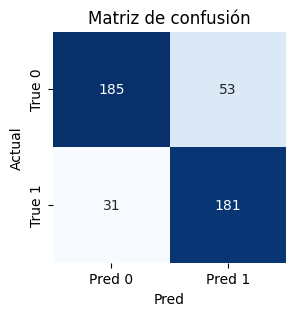

In [22]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Calculo de score para set de prueba
print(f"="*60)
print(f"Accuracy con Test set para mejor modelo:")
print(f"="*60)
mejor_modelo = models[best_model]['model']
if best_model == 'NN':
  test_loss, test_acc = modeloNN.evaluate(x_test_np, y_test, verbose=0)
  print(f"{best_model}: {100*test_acc:.2f}%")
  prediction = (modeloNN.predict(x_test_np) > 0.5).astype("int32")
else:
  print(f"{best_model}: {100*mejor_modelo.score(testEmb, y_test):.2f}%")
  prediction = mejor_modelo.predict(testEmb)
  print()
OpenAI_test_avg = f"{best_model}: {100*best_acc:.2f}%"

# Reporte de clasificación
print(f"="*60)
print(f"Reporte de clasificación:")
print(f"="*60)
print(classification_report(y_test, prediction))

# Matriz de confusión
print(f"="*60)
print(f"Matriz de confusión:")
print(f"="*60)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix(prediction,y_test),# normalize='true'),
            annot=True, fmt='d',
            cmap='Blues',
            cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'],
            )
plt.title("Matriz de confusión")
plt.xlabel('Pred')
plt.ylabel('Actual')
plt.show()

# *********** Aquí termina la sección de agregar código *************

# **Pregunta - 10:**

Ahora, como segunda parte de esta actividad:


a. Realiza la transformación a vectores embebidos de todos los 3000 comentarios tal como están
dados en los archivos. Selecciona el modelo de vector embebido que consideres más
adecuado. Indica la cantidad de tokens de OpenAI utilizados en el proceso.


b. Realiza una partición en Train-Val-Test del 70%, 15% y 15%, respectivamente. Usa la misma
semilla que utilizaste en el ejercicio 3, para la partición.


c. Utiliza los modelos de regresión logística y bosque aleatorio (random forest) para este
problema de clasificación. Para cada modelo muestra el valor de la exactitud (accuracy) y el
reporte de sklearn dado por la función classification_report(). Verifica que no estén
sobreentrenados y compara tus resultados con los que obtuviste en la primera parte. Puedes
incluir algún otro modelo de machine learning si lo consideras adecuado.

In [23]:
# Se crea copia del modelo original
data = df.copy()

# Llamar manejo de embeddings para 3small
modelo = "text-embedding-3-small"
file_name = "raw2_embeddings_3small.pkl"
raw2_embeddings_dict_3small = embeddings_handling(modelo, file_name, data["review"]) # Nótese que se usa el dataframe y no el diccionario como entrada

#Imprimir tokens usados
#print(f"Total de tokens usados: 43804")

# Imprimir notas
print(f"="*60)
print(f"NOTA - Se debe tener cuidado con el tamaño de los embeddings generados:")
print(f">>> Tamaño dataframe de entrada: {len(data['review'])}")
print(f">>> Tamaño del diccionario de embeddings: {len(raw2_embeddings_dict_3small)}")

# Imprimir notas
print(f"\nComo se aprecia, son menos los embeddings que los comentarios.")
print(f"Analicemos la cantidad de comentarios unicos encontrados:")
print(f">>> Valores unicos del df de entrada: {len(set(data['review']))}")
print(f"\nComo se aprecia, solamente se generan los embeddings para comentarios únicos,")
print(f"por lo que se tendrán que reasignar a cada comentario para su análisis.")

# Reasignando valores de embeddings a cada comentario dentro del dataframe, incluyendo repetidos
data["embedding"] = data["review"].map(raw2_embeddings_dict_3small)
print(f">>> Tamaño dataframe (embeddings) después de cambios: {len(data['embedding'])}")

Archivo 'raw2_embeddings_3small.pkl' no encontrado. Generando embeddings...


100%|██████████| 3000/3000 [14:41<00:00,  3.40it/s]


Embeddings guardados como 'raw2_embeddings_3small.pkl'.
Total de tokens usados: 43804
NOTA - Se debe tener cuidado con el tamaño de los embeddings generados:
>>> Tamaño dataframe de entrada: 3000
>>> Tamaño del diccionario de embeddings: 2982

Como se aprecia, son menos los embeddings que los comentarios.
Analicemos la cantidad de comentarios unicos encontrados:
>>> Valores unicos del df de entrada: 2982

Como se aprecia, solamente se generan los embeddings para comentarios únicos,
por lo que se tendrán que reasignar a cada comentario para su análisis.
>>> Tamaño dataframe (embeddings) después de cambios: 3000


In [24]:
# Creando las variables de X y Y parra nuestro nuevo análisis desde el dataframe
Xraw = list(data["embedding"])
yraw = data["label"]

# Se dividen los sets de entrenamiento, validación y prueba
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xraw, yraw, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

# Análisis para modelo de LogisticRegression
print(f"="*60)
print(f"LR")
print(f"="*60)
modeloLR = LogisticRegression(C=0.6, solver='lbfgs', penalty='l2')
modeloLR.fit(x_train, y_train)
LR_ScoreTrain = modeloLR.score(x_train, y_train)
LR_ScoreVal = modeloLR.score(x_val, y_val)
print(f"LR_ScoreTrain: {100*LR_ScoreTrain:.2f}%")
print(f"LR_ScoreVal: {100*LR_ScoreVal:.2f}%")
print(classification_report(y_test, modeloLR.predict(x_test)))

# Análisis para modelo de RandomForest
print(f"="*60)
print(f"RF")
print(f"="*60)
modeloRF = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=12)
modeloRF.fit(x_train, y_train)
RF_ScoreTrain = modeloRF.score(x_train, y_train)
RF_ScoreVal = modeloRF.score(x_val, y_val)
print(f"RF_ScoreTrain: {100*RF_ScoreTrain:.2f}%")
print(f"RF_ScoreVal: {100*RF_ScoreVal:.2f}%")
print(classification_report(y_test, modeloRF.predict(x_test)))

# Análisis por LNN
print("="*60)
print("NN (Red Neuronal Lineal)")
print("="*60)
x_train_np = np.array(x_train)
x_val_np = np.array(x_val)
x_test_np = np.array(x_test)
modeloNN = Sequential([
    Input(shape=(x_train_np.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
modeloNN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
modeloNN.fit(x_train_np, y_train, validation_data=(x_val_np, y_val), epochs=15, batch_size=32, verbose=0)
train_loss, NN_ScoreTrain = modeloNN.evaluate(x_train_np, y_train, verbose=0)
val_loss, NN_ScoreVal = modeloNN.evaluate(x_val_np, y_val, verbose=0)
print(f"NN_ScoreTrain: {100*NN_ScoreTrain:.2f}%")
print(f"NN_ScoreVal: {100*NN_ScoreVal:.2f}%")
y_pred_nn = (modeloNN.predict(x_test_np) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_nn))

LR
LR_ScoreTrain: 98.24%
LR_ScoreVal: 96.89%
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       216
           1       0.98      0.97      0.98       234

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

RF
RF_ScoreTrain: 97.33%
RF_ScoreVal: 96.00%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       216
           1       0.96      0.96      0.96       234

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

NN (Red Neuronal Lineal)
NN_ScoreTrain: 99.05%
NN_ScoreVal: 97.56%
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       216
           1       0.98      0.98      0.

In [25]:
# Se crea diccionario con los modelos y sus resultados
models = {
    'LR': {'model': modeloLR, 'scoreVal': LR_ScoreVal, 'scoreTrain':LR_ScoreTrain},
    'RF': {'model': modeloRF, 'scoreVal': RF_ScoreVal,'scoreTrain': RF_ScoreTrain},
    'NN': {'model': modeloNN, 'scoreVal': NN_ScoreVal, 'scoreTrain': NN_ScoreTrain}
}
OpenAI_models_raw = models

# Desplegar tabla de resultados
print(f"="*60)
print(f"Tabla de comparación de resultados")
print(f"="*60)
resultados = comparar_modelos(models)
print(f"\n")

# Verificación de overfitting:
print(f"="*60)
print(f"Verificación de Overfitting (Diff<0.05)")
print(f"="*60)
for i,_ in enumerate(resultados):
  if resultados[i]['Diff'] > 0.05:
    print(f"❌ Posible overfitting en modelo {resultados[i]['Modelo']}")
  else: print(f"✅ Modelo {resultados[i]['Modelo']} sin overfitting")
print(f"\n")

# Definición del mejor modelo
print(f"="*60)
print(f"Selección del mejor modelo")
print(f"="*60)
best_acc = 0
best_model = ''
for i,_ in enumerate(resultados):
    if resultados[i]['Val'] > best_acc:
      best_acc = resultados[i]['Val']
      best_model = resultados[i]['Modelo']
print(f"✅ Mejor modelo: {best_model} con {100*best_acc:.2f}% de accuracy en set de validación")
OpenAI_test_raw = f"{best_model}: {100*best_acc:.2f}%"

Tabla de comparación de resultados


,Train,Val,Diff
Modelo,,,
LR,0.982,0.969,0.013
RF,0.973,0.960,0.013
NN,0.990,0.976,0.015




Verificación de Overfitting (Diff<0.05)
✅ Modelo LR sin overfitting
✅ Modelo RF sin overfitting
✅ Modelo NN sin overfitting


Selección del mejor modelo
✅ Mejor modelo: NN con 97.60% de accuracy en set de validación


# Gemini

Como ejercicio extra, se volvió a repetir el análisis, utilizando ahora embeddings generados con **Gemini** en lugar de OpenAI.

Se agregó una sola celda de código que despliega el análisis para el caso donde se utlizia el **promedio de vectores** y otra para **oraciones completas**.

## Promedio de vectores del embedding

Carga de archivos PKL:
¡Al menos un archivo no fue encontrado en la carpeta raíz! Se procederá con la descarga de todos.
Downloading...
From: https://drive.google.com/uc?id=1X_KTwN5MiKxTzk6IsjZa8scfJkPoRhe_
To: /content/embeddings_gemini.pkl
100% 2.80M/2.80M [00:00<00:00, 18.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u2qL1PAdS5DfdIsIX7inlvALHip3EZZi
To: /content/raw_embeddings_gemini4.pkl
100% 20.8M/20.8M [00:00<00:00, 50.3MB/s]
¡Archivo 'raw_embeddings_gemini4.pkl' encontrado en la carpeta raíz!
Archivo 'embeddings_gemini.pkl' encontrado. Se cargará el archivo.

Embedding a utilizar: embeddings_gemini
Type: <class 'dict'>
Longitud: 1462
[0] star: ['0.0210', '-0.0058', '-0.0245', '0.0045', '0.0176']...
[1] don: ['0.0280', '-0.0386', '-0.0376', '0.0534', '0.0257']...
[2] fare: ['0.0530', '0.0251', '-0.0367', '0.0017', '-0.0069']...
[3] much: ['0.0669', '-0.0237', '-0.0200', '-0.0009', '-0.0075']...
[4] good: ['0.0158', '0.0284', '-0.0381', '-0.0074', '0.0438']...

Calcu

,Train,Val,Diff
Modelo,,,
LR,0.820,0.831,0.011
RF,0.840,0.804,0.036
NN,0.842,0.838,0.005




Verificación de Overfitting (Diff<0.05)
✅ Modelo LR sin overfitting
✅ Modelo RF sin overfitting
✅ Modelo NN sin overfitting


Selección del mejor modelo
✅ Mejor modelo: NN con 83.80% de accuracy en set de validación

Accuracy con Test set para mejor modelo:
NN: 80.89%
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de confusión:


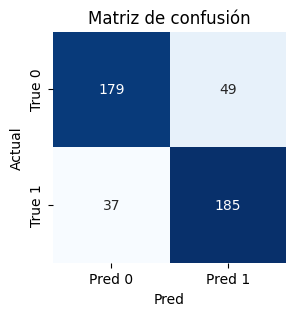

In [26]:
# Descargar modelos de Gemini
files = ['embeddings_gemini.pkl', 'raw_embeddings_gemini4.pkl']
print(f"="*60)
print(f"Carga de archivos PKL:")
print(f"="*60)
for file in files:
  if os.path.isfile(file):
      print(f"¡Archivo '{file}' encontrado en la carpeta raíz!")
  else:
      print(f"¡Al menos un archivo no fue encontrado en la carpeta raíz! Se procederá con la descarga de todos.")
      !gdown https://drive.google.com/uc?id=1X_KTwN5MiKxTzk6IsjZa8scfJkPoRhe_ -O embeddings_gemini.pkl
      !gdown https://drive.google.com/uc?id=1u2qL1PAdS5DfdIsIX7inlvALHip3EZZi -O raw_embeddings_gemini4.pkl

# Llamar manejo de embeddings para Gemini
modelo = "embeddings_gemini"
file_name = "embeddings_gemini.pkl"
embeddings_dict_gemini = embeddings_handling(modelo, file_name, midicc)

# Desplegar ejemplos de vectores
print()
print(f"="*60)
print(f"Embedding a utilizar: {modelo}")
print(f"="*60)
print(f"Type: {type(embeddings_dict_gemini)}")
print(f"Longitud: {len(embeddings_dict_gemini)}")
for i, (word, vector) in enumerate(embeddings_dict_gemini.items()):
  print(f"[{i}] {word}: {[f'{v:.4f}' for v in vector[:5]]}...")
  if i >= 4: break

# Calcular promedios y desplegar datasets
print()
print(f"="*60)
print(f"Calculando promedios para cada set de datos")
print(f"="*60)
trainEmb = embeddings_dataset(train_x, embeddings_dict)
valEmb   = embeddings_dataset(val_x, embeddings_dict)
testEmb  = embeddings_dataset(test_x, embeddings_dict)
print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

# Modelo LogisticRegression
print()
print(f"="*60)
print(f"Resultados para LR")
print(f"="*60)
modeloLR = LogisticRegression(C=0.6, solver='lbfgs', penalty='l2')
modeloLR.fit(trainEmb, y_train)
LR_ScoreTrain = modeloLR.score(trainEmb, y_train)
LR_ScoreVal = modeloLR.score(valEmb, y_val)
print(f"LR_ScoreTrain: {100*LR_ScoreTrain:.2f}%")
print(f"LR_ScoreVal: {100*LR_ScoreVal:.2f}%")
#print(classification_report(y_test, modeloLR.predict(testEmb)))

# Modelo RandomForest
print()
print(f"="*60)
print(f"Resultados para RF")
print(f"="*60)
modeloRF = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=12)
modeloRF.fit(trainEmb, y_train)
RF_ScoreTrain = modeloRF.score(trainEmb, y_train)
RF_ScoreVal = modeloRF.score(valEmb, y_val)
print(f"RF_ScoreTrain: {100*RF_ScoreTrain:.2f}%")
print(f"RF_ScoreVal: {100*RF_ScoreVal:.2f}%")
#print(classification_report(y_test, modeloRF.predict(testEmb)))

# Modelo NeuralNetwork
print()
print(f"="*60)
print(f"Resultados para NN")
print(f"="*60)
x_train_np = np.array(trainEmb)
x_val_np = np.array(valEmb)
x_test_np = np.array(testEmb)
modeloNN = Sequential([
    Input(shape=(x_train_np.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
modeloNN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
modeloNN.fit(x_train_np, y_train, validation_data=(x_val_np, y_val), epochs=15, batch_size=32, verbose=0)
train_loss, NN_ScoreTrain = modeloNN.evaluate(x_train_np, y_train, verbose=0)
val_loss, NN_ScoreVal = modeloNN.evaluate(x_val_np, y_val, verbose=0)
print(f"NN_ScoreTrain: {100*NN_ScoreTrain:.2f}%")
print(f"NN_ScoreVal: {100*NN_ScoreVal:.2f}%")
y_pred_nn = (modeloNN.predict(x_test_np) > 0.5).astype("int32")
#print(classification_report(y_test, y_pred_nn))


# Creando un diccionario con los modelos y sus respectivos scores
models = {
    'LR': {'model': modeloLR, 'scoreVal': LR_ScoreVal, 'scoreTrain':LR_ScoreTrain},
    'RF': {'model': modeloRF, 'scoreVal': RF_ScoreVal,'scoreTrain': RF_ScoreTrain},
    'NN': {'model': modeloNN, 'scoreVal': NN_ScoreVal, 'scoreTrain': NN_ScoreTrain}
}
Gemini_models_avg = models


# Función para crear una tabla que compare el desempeño de los modelos, dado el diccionario anterior
def comparar_modelos(models):
    resultados = []
    for nombre, info in models.items():
        acc_val = info['scoreVal']
        acc_train = info['scoreTrain']
        diferencia = abs(acc_val - acc_train)
        resultados.append({
            'Modelo': nombre,
            'Train': round(acc_train, 3),
            'Val': round(acc_val, 3),
            'Diff': round(diferencia, 3)
        })
    tabla = pd.DataFrame(resultados)
    tabla.set_index('Modelo', inplace=True)
    display(tabla)
    return(resultados)

# Desplegar tabla de resultados
print(f"="*60)
print(f"Tabla de comparación de resultados")
print(f"="*60)
resultados = comparar_modelos(models)
print(f"\n")

# Verificación de overfitting:
print(f"="*60)
print(f"Verificación de Overfitting (Diff<0.05)")
print(f"="*60)
for i,_ in enumerate(resultados):
  if resultados[i]['Diff'] > 0.05:
    print(f"❌ Posible overfitting en modelo {resultados[i]['Modelo']}")
  else: print(f"✅ Modelo {resultados[i]['Modelo']} sin overfitting")
print(f"\n")

# Definición del mejor modelo
print(f"="*60)
print(f"Selección del mejor modelo")
print(f"="*60)
best_acc = 0
best_model = ''
for i,_ in enumerate(resultados):
    if resultados[i]['Val'] > best_acc:
      best_acc = resultados[i]['Val']
      best_model = resultados[i]['Modelo']
print(f"✅ Mejor modelo: {best_model} con {100*best_acc:.2f}% de accuracy en set de validación")
Gemini_test_avg = f"{best_model}: {100*best_acc:.2f}%"

# Calculo de score para set de prueba
print()
print(f"="*60)
print(f"Accuracy con Test set para mejor modelo:")
print(f"="*60)
mejor_modelo = models[best_model]['model']
if best_model == 'NN':
  test_loss, test_acc = modeloNN.evaluate(x_test_np, y_test, verbose=0)
  print(f"{best_model}: {100*test_acc:.2f}%")
  prediction = (modeloNN.predict(x_test_np) > 0.5).astype("int32")
else:
  print(f"{best_model}: {100*mejor_modelo.score(testEmb, y_test):.2f}%")
  prediction = mejor_modelo.predict(testEmb)
  print()

# Reporte de clasificación
#print(f"="*60)
#print(f"Reporte de clasificación:")
#print(f"="*60)
#print(classification_report(y_test, prediction))

# Matriz de confusión
print(f"="*60)
print(f"Matriz de confusión:")
print(f"="*60)
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix(prediction,y_test),# normalize='true'),
            annot=True, fmt='d',
            cmap='Blues',
            cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'],
            )
plt.title("Matriz de confusión")
plt.xlabel('Pred')
plt.ylabel('Actual')
plt.show()

## Oraciones completas

In [27]:
# Llamar manejo de embeddings para raw_embeddings_gemini4
modelo = "raw_embeddings_gemini4"
file_name = "raw_embeddings_gemini4.pkl"
raw_embeddings_gemini4 = embeddings_handling(modelo, file_name, data["review"])

# Reasignando valores de embeddings a cada comentario dentro del dataframe, incluyendo repetidos
data["embedding"] = data["review"].map(raw_embeddings_gemini4)

# Creando las variables de X y Y parra nuestro nuevo análisis desde el dataframe
Xraw = list(data["embedding"])
yraw = data["label"]

# Se dividen los sets de entrenamiento, validación y prueba
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xraw, yraw, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

# Análisis para modelo de LogisticRegression
print(f"="*60)
print(f"LR")
print(f"="*60)
modeloLR = LogisticRegression(C=0.6, solver='lbfgs', penalty='l2')
modeloLR.fit(x_train, y_train)
LR_ScoreTrain = modeloLR.score(x_train, y_train)
LR_ScoreVal = modeloLR.score(x_val, y_val)
print(f"LR_ScoreTrain: {100*LR_ScoreTrain:.2f}%")
print(f"LR_ScoreVal: {100*LR_ScoreVal:.2f}%")
#print(classification_report(y_test, modeloLR.predict(x_test)))

# Análisis para modelo de RandomForest
print(f"="*60)
print(f"RF")
print(f"="*60)
modeloRF = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=12)
modeloRF.fit(x_train, y_train)
RF_ScoreTrain = modeloRF.score(x_train, y_train)
RF_ScoreVal = modeloRF.score(x_val, y_val)
print(f"RF_ScoreTrain: {100*RF_ScoreTrain:.2f}%")
print(f"RF_ScoreVal: {100*RF_ScoreVal:.2f}%")
#print(classification_report(y_test, modeloRF.predict(x_test)))

# Análisis por LNN
print("="*60)
print("NN (Red Neuronal Lineal)")
print("="*60)
x_train_np = np.array(x_train)
x_val_np = np.array(x_val)
x_test_np = np.array(x_test)
modeloNN = Sequential([
    Input(shape=(x_train_np.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
modeloNN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
modeloNN.fit(x_train_np, y_train, validation_data=(x_val_np, y_val), epochs=15, batch_size=32, verbose=0)
train_loss, NN_ScoreTrain = modeloNN.evaluate(x_train_np, y_train, verbose=0)
val_loss, NN_ScoreVal = modeloNN.evaluate(x_val_np, y_val, verbose=0)
print(f"NN_ScoreTrain: {100*NN_ScoreTrain:.2f}%")
print(f"NN_ScoreVal: {100*NN_ScoreVal:.2f}%")
y_pred_nn = (modeloNN.predict(x_test_np) > 0.5).astype("int32")
#print(classification_report(y_test, y_pred_nn))

# Se crea diccionario con los modelos y sus resultados
models = {
    'LR': {'model': modeloLR, 'scoreVal': LR_ScoreVal, 'scoreTrain':LR_ScoreTrain},
    'RF': {'model': modeloRF, 'scoreVal': RF_ScoreVal,'scoreTrain': RF_ScoreTrain},
    'NN': {'model': modeloNN, 'scoreVal': NN_ScoreVal, 'scoreTrain': NN_ScoreTrain}
}
Gemini_models_raw = models

# Desplegar tabla de resultados
print(f"="*60)
print(f"Tabla de comparación de resultados")
print(f"="*60)
resultados = comparar_modelos(models)
print(f"\n")

# Verificación de overfitting:
print(f"="*60)
print(f"Verificación de Overfitting (Diff<0.05)")
print(f"="*60)
for i,_ in enumerate(resultados):
  if resultados[i]['Diff'] > 0.05:
    print(f"❌ Posible overfitting en modelo {resultados[i]['Modelo']}")
  else: print(f"✅ Modelo {resultados[i]['Modelo']} sin overfitting")
print(f"\n")

# Definición del mejor modelo
print(f"="*60)
print(f"Selección del mejor modelo")
print(f"="*60)
best_acc = 0
best_model = ''
for i,_ in enumerate(resultados):
    if resultados[i]['Val'] > best_acc:
      best_acc = resultados[i]['Val']
      best_model = resultados[i]['Modelo']
print(f"✅ Mejor modelo: {best_model} con {100*best_acc:.2f}% de accuracy en set de validación")
Gemini_test_raw = f"{best_model}: {100*best_acc:.2f}%"

Archivo 'raw_embeddings_gemini4.pkl' encontrado. Se cargará el archivo.
LR
LR_ScoreTrain: 97.90%
LR_ScoreVal: 98.00%
RF
RF_ScoreTrain: 97.81%
RF_ScoreVal: 97.56%
NN (Red Neuronal Lineal)
NN_ScoreTrain: 98.10%
NN_ScoreVal: 97.78%
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Tabla de comparación de resultados


,Train,Val,Diff
Modelo,,,
LR,0.979,0.980,0.001
RF,0.978,0.976,0.003
NN,0.981,0.978,0.003




Verificación de Overfitting (Diff<0.05)
✅ Modelo LR sin overfitting
✅ Modelo RF sin overfitting
✅ Modelo NN sin overfitting


Selección del mejor modelo
✅ Mejor modelo: LR con 98.00% de accuracy en set de validación


# **Pregunta - 11:**

Se agregan tablas de comparaciones de los resultados obtenidos en todos los modelos del ejercicio.

In [28]:
# Comparando resultados

print(f"="*60)
print(f"Resultados con set TEST")
print(f"="*60)
print(f"Promedio de vectores:")
print(f"Gemini - {Gemini_test_avg} ✅")
print(f"OpenAI - {OpenAI_test_avg}")
print()

print(f"Comentarios completos:")
print(f"Gemini - {Gemini_test_raw} ✅")
print(f"Gemini - {OpenAI_test_raw}")

print()
print(f"="*60)
print(f"Otros resultados para TRAIN y VAL")
print(f"="*60)

# Función para convertir los diccionarios en DF
def create_comparison_df(*model_dicts, names=None):
    records = []
    for i, model_dict in enumerate(model_dicts):
        label = names[i] if names else f'ModelSet_{i+1}'
        for model_name, metrics in model_dict.items():
            records.append({
                'Source': label,
                'Model': model_name,
                'Validation Score': metrics['scoreVal'],
                'Training Score': metrics['scoreTrain']
            })
    return pd.DataFrame(records)

# Creando DataFrame
comparison_df = create_comparison_df(
    OpenAI_models_avg, OpenAI_models_raw, Gemini_models_avg, Gemini_models_raw,
    names=['OpenAI Avg', 'OpenAI Raw', 'Gemini Avg', 'Gemini Raw']
)

# Desplegando resultados
display(comparison_df.sort_values(by='Validation Score', ascending=False))

Resultados con set TEST
Promedio de vectores:
Gemini - NN: 83.80% ✅
OpenAI - NN: 83.80%

Comentarios completos:
Gemini - LR: 98.00% ✅
Gemini - NN: 97.60%

Otros resultados para TRAIN y VAL


,Source,Model,Validation Score,Training Score
9,Gemini Raw,LR,0.980000,0.979048
11,Gemini Raw,NN,0.977778,0.980952
10,Gemini Raw,RF,0.975556,0.978095
5,OpenAI Raw,NN,0.975556,0.990476
3,OpenAI Raw,LR,0.968889,0.982381
4,OpenAI Raw,RF,0.960000,0.973333
2,OpenAI Avg,NN,0.837778,0.841429
8,Gemini Avg,NN,0.837778,0.842381
6,Gemini Avg,LR,0.831111,0.820476
0,OpenAI Avg,LR,0.831111,0.820476




Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Rahimi & Homayounpour (2022) sostienen que la eliminiación de *stopwords* y de signos de puntuación afecta negativamente en el desempeño general de modelos de análisis de sentimiento. Los autores sugieren que remover palabras en inglés como "not" y "don't" puede llegar a cambios de polaridades y a la pérdida de información contextual intrínseca al resultado. No obstante, en nuestra limpieza, estas palabras fueron protegidas deliberadamente, aunque no así las preposiciones, artículos y otras POS consideradas stopwords. Es por esta razón que los modelos entrenados con texto crudo, como es el caso de los llamados text-embedding de OpenAI o Llama de Meta funcionaron mejor sin preprocesamiento.

En el inciso 6 de la presente actividad se ha propuesto el uso de 3 diferentes modelos para la generación de nuestro nuevo diccionario que contiene cada palabra del vocabulario, acompañada de su respectivo vector embebido.

text-embedding-3-small
text-embedding-3-large
text-embedding-ada-002

Sin embargo, como equipo 20 hemos decidio hacer uso del modelo *text-embedding-3-small* para el desarrollo de esta actividad.

Como se ha podido observar, en los resulatos de los modelos de Regresión lineal, Bosque aleatorio y la Red Neuronal Lineal, esta última ha sido la que mejor desempeño logró, seguido por el modelo *Regresión Lineal LR*, tanto para los conjuntos de datos embebidos, como también para el conjunto de datos tomado del Dataframe inicial con los 3000 comentarios.

En cada una de las evaluaciones se ha garantizado la ausencia de sobreentrenamiento a través de comparaciones en las cuales se valida que la diferencia entre Accuracy, tanto del conjunto de entrenamiento como del conjunto de validación no supere los 0.05 de diferencia (Diff<0.05).

De manera general, en este ejercicio se compararon dos enfoques para clasificar textos o comentarios: el uso de embeddings promedio por token y el uso de oraciones completas.
Al aplicar la técnica de promediar los embeddings de cada token, se logró un desempeño razonable con un accuracy que ronda entre los valores de 80% para los tres modelos utilizados. Sin embargo, al utilizar embeddings que capturan el significado global de la oración, como en el ejercicio 10, el rendimiento mejoró significativamente, logrando evaluaciones de hasta 97% de precisión.

De igual manera, se logró comparar dos servicios de generacion de embeddings, en este caso con OpenAI y Gemini, logrando un mejor resultado con el uso de Gemini, logrando un 98% de accuracy en el set de prueba (test) tanto para el modelo de regresión logística (LR) como para la red neuronal lineal (NN).

Este resultado demuestra que, para tareas donde el contexto completo y el significado general del texto son fundamentales, como en la clasificación de comentarios o sentimientos, los embeddings de oraciones completas tienden a ser más efectivos que los métodos que trabajan a nivel de palabra.


# Referencias

Lee, J., Chen, F., Dua, S., Cer, D., Shanbhogue, M., Naim, I., Ábrego, G. H., Li, Z., Chen, K., Vera, H. S., Ren, X., Zhang, S., Salz, D., Boratko, M., Han, J., Chen, B., Huang, S., Rao, V., Suganthan, P., ... Duerig, T. (2025). Gemini Embedding: Generalizable Embeddings from Gemini. arXiv. https://arxiv.org/abs/2503.07891


### ++++++++ Termina la sección de agregar texto: +++++++++++

# **Fin de la Actividad de Vectores Embebidos - OpenAI**